# create figures for hot1a3 DE Axenic 

In [1]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)
library(circlize)

Warning message:
"package 'DESeq2' was built under R version 4.2.2"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
"package 'BiocGenerics' was built under R version 4.2.1"

Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    exp

In [2]:
library(ggrastr)

Warning message:
"package 'ggrastr' was built under R version 4.2.3"


In [3]:
library(ggrepel)

Warning message:
"package 'ggrepel' was built under R version 4.2.1"


In [4]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [5]:
source('../src/common_functions.R')

Warning message:
"package 'ComplexHeatmap' was built under R version 4.2.1"
Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))
! pheatmap() has been masked by ComplexHeatmap::pheatmap(). Most of the arguments
   in the original pheatmap() are identically supported in the new function. You 
   can still use the original fu

In [6]:
df_all_orig = read_csv(file.path('DE_results', 'HOT1A3_all_FC_results.csv'))



Warning message:
"One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 97675 Columns: 36
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (25): contrast, protein_id, Assay, contrast1, seq_id, Name, gene, gene_s...
dbl  (7): logFC, AveExpr, pvalue, padj, start, end, gene_length
lgl  (4): exception, down, up, is_de

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
# fill in N/A
df_all_orig = df_all_orig %>% mutate(Membrane.transport = replace_na(Membrane.transport, ""))

In [8]:
df_all_orig %>% count(contrast1)

contrast1,n
<chr>,<int>
A2vsA1_prot,2229
A2vsA1_rna,4015
A3vsA1_prot,2229
A3vsA1_rna,4015
A3vsA2_prot,2229
A5vsA1_prot,2229
A5vsA3_prot,2229
C1vsA1_rna,4015
C2vsC1_prot,2229


In [9]:
df_all = df_all_orig %>%
    filter(contrast1 %in% c('A2vsA1_prot', 'A2vsA1_rna'))

In [10]:
df_degenes = df_all_orig %>% 
    filter(padj < 0.05)

In [11]:
df_degenes2 = df_all_orig %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>1.5)

In [12]:
df_all %>% count(Category) %>% arrange(desc(n)) 

Category,n
<chr>,<int>
Other,1849
Uncharacterized,924
Genetic Info,883
Membrane transport,539
Metabolism,535
AA/Nucleotide,483
Energy/Carbohydrate/Glycan,420
Env. Info/Cellular Process,276
Motility,182


In [13]:
unique(df_all$contrast1)

[1] "A2vsA1_prot" "A2vsA1_rna"

In [14]:
t(head(df_all))

contrast,A2 - A1,A2 - A1,A2 - A1,A2 - A1,A2 - A1,A2 - A1
protein_id,WP_061439403.1,WP_061486784.1,WP_061485314.1,WP_061486950.1,WP_014949936.1,WP_232375969.1
logFC,2.3595517,-1.4283199,1.3860366,0.7175535,2.1542861,0.7475071
AveExpr,-4.025685,1.466380,-3.194890,3.252700,-3.576857,2.975793
pvalue,0.0001738172,0.0005445168,0.0007923445,0.0008636963,0.0009262719,0.0009747465
padj,0.2733646,0.2733646,0.2733646,0.2733646,0.2733646,0.2733646
Assay,Proteome,Proteome,Proteome,Proteome,Proteome,Proteome
contrast1,A2vsA1_prot,A2vsA1_prot,A2vsA1_prot,A2vsA1_prot,A2vsA1_prot,A2vsA1_prot
seq_id,NZ_CP012202.1,NZ_CP012202.1,NZ_CP012202.1,NZ_CP012202.1,NZ_CP012202.1,NZ_CP012202.1
Name,ACZ81_RS02770,ACZ81_RS18915,ACZ81_RS06760,ACZ81_RS06575,ACZ81_RS12240,ACZ81_RS18650
gene,NA,NA,NA,NA,NA,NA


In [15]:
# number of differentiall expressed genes
df_all %>%
    filter(padj < 0.05) %>% count(Assay, down)

Assay,down,n
<chr>,<lgl>,<int>
RNA,FALSE,276
RNA,TRUE,621


# Top up and down regulated genes

In [16]:
df_all %>%
    filter(padj < 0.05, Category=='Metabolism') %>% top_n(-20, logFC) %>% 
    select(Assay,logFC,gene, product, Category, path) #%>% 
    #select(Assay,logFC,gene)

Assay,logFC,gene,product,Category,path
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
RNA,-2.313607,NA,PQQ-dependent sugar dehydrogenase,Metabolism,99980 Enzymes with EC numbers
RNA,-2.948683,sodN,superoxide dismutase%2C Ni,Metabolism,99980 Enzymes with EC numbers
RNA,-2.310058,(fabH),ketoacyl-ACP synthase III,Metabolism,00061 Fatty acid biosynthesis [PATH:ko00061];01004 Lipid biosynthesis proteins [BR:ko01004]
RNA,-2.030403,NA,SDR family oxidoreductase,Metabolism,00130 Ubiquinone and other terpenoid-quinone biosynthesis [PATH:ko00130]
RNA,-2.105499,folX,dihydroneopterin triphosphate 2'-epimerase,Metabolism,00790 Folate biosynthesis [PATH:ko00790]
RNA,-2.424044,(maa),sugar O-acetyltransferase,Metabolism,99980 Enzymes with EC numbers
RNA,-3.147862,ahpC,alkyl hydroperoxide reductase subunit C,Metabolism,99980 Enzymes with EC numbers
RNA,-4.448882,ahpF,alkyl hydroperoxide reductase subunit F,Metabolism,99980 Enzymes with EC numbers
RNA,-1.917671,NA,demethoxyubiquinone hydroxylase family protein,Metabolism,00130 Ubiquinone and other terpenoid-quinone biosynthesis [PATH:ko00130]


In [17]:
get_top_gene_id <- function(df_all, assay, top_number) {
    df_all %>%
        filter(padj < 0.05) %>% 
        filter(Assay == assay) %>% 
        top_n(top_number, logFC) %>% 
        select(gene_id, Assay)
}
number_of_top_ids = 5
top_up_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', number_of_top_ids), get_top_gene_id(df_all, 'RNA', number_of_top_ids)))
top_down_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', -number_of_top_ids), get_top_gene_id(df_all, 'RNA', -number_of_top_ids)))


In [18]:
dput(names(df_all))

c("contrast", "protein_id", "logFC", "AveExpr", "pvalue", "padj", 
"Assay", "contrast1", "seq_id", "Name", "gene", "gene_synonym", 
"locus_tag", "old_locus_tag", "source", "start", "end", "strand", 
"Note", "exception", "inference", "product", "gene_length", "path_id", 
"main", "sub", "path", "ecpath", "Category", "Membrane.transport", 
"kegg_gene1", "kegg_gene2", "gene_id", "down", "up", "is_de")


In [19]:
df_pivot_for_top = df_all %>%
    pivot_wider(
        names_from = 'Assay',
        values_from = c("logFC", #"AveExpr", "pvalue",
                        "padj", ),
        id_cols=c("gene_id",  "gene",  "product",  "sub", 
                  #"module",
                  "path"
                  #"pathway",
                 # "ecpath"
                 )
    ) %>% select(gene_id, gene, product, sub, path, logFC_Proteome, padj_Proteome,logFC_RNA,padj_RNA)


In [20]:
dput(names(df_pivot_for_top))

c("gene_id", "gene", "product", "sub", "path", "logFC_Proteome", 
"padj_Proteome", "logFC_RNA", "padj_RNA")


In [21]:
df_pivot_for_top %>% filter(gene_id %in% top_up_de_genes$gene_id) %>% arrange(desc(logFC_RNA), desc(logFC_Proteome) )

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ACZ81_RS17125,NA,hypothetical protein,NA,NA,NA,NA,4.390256,9.040055e-11
ACZ81_RS19455,NA,C1 family peptidase,NA,NA,0.9707673,0.2784911,3.460195,1.603539e-04
ACZ81_RS17215,NA,DUF11 domain-containing protein,NA,NA,0.6490809,0.5054344,3.038025,1.518960e-03
ACZ81_RS16090,NA,minor curlin subunit CsgB,NA,NA,NA,NA,3.025879,8.727328e-04
ACZ81_RS13985,NA,hypothetical protein,NA,NA,0.3482730,0.9430901,2.786269,1.520306e-04


In [22]:
df_pivot_for_top %>% filter(gene_id %in% top_down_de_genes$gene_id)%>% arrange(logFC_RNA, logFC_Proteome) 

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ACZ81_RS16915,NA,ankyrin repeat domain-containing protein,09194 Poorly characterized,99997 Function unknown,NA,NA,-6.181810,0.0001733828
ACZ81_RS08845,ahpF,alkyl hydroperoxide reductase subunit F,09191 Unclassified: metabolism,99980 Enzymes with EC numbers,0.1700846,0.9943445,-4.448882,0.0007527644
ACZ81_RS02015,"(katE,catB,srpA)",catalase,09101 Carbohydrate metabolism;09105 Amino acid metabolism;09132 Signal transduction;09141 Transport and catabolism,00380 Tryptophan metabolism [PATH:ko00380];00630 Glyoxylate and dicarboxylate metabolism [PATH:ko00630];04011 MAPK signaling pathway - yeast [PATH:ko04011];04016 MAPK signaling pathway - plant [PATH:ko04016];04068 FoxO signaling pathway [PATH:ko04068];04146 Peroxisome [PATH:ko04146],NA,NA,-4.341387,0.0004167082
ACZ81_RS16920,"(katE,catB,srpA)",catalase,09101 Carbohydrate metabolism;09105 Amino acid metabolism;09132 Signal transduction;09141 Transport and catabolism,00380 Tryptophan metabolism [PATH:ko00380];00630 Glyoxylate and dicarboxylate metabolism [PATH:ko00630];04011 MAPK signaling pathway - yeast [PATH:ko04011];04016 MAPK signaling pathway - plant [PATH:ko04016];04068 FoxO signaling pathway [PATH:ko04068];04146 Peroxisome [PATH:ko04146],NA,NA,-4.149843,0.0021174153
ACZ81_RS08360,NA,DUF2061 domain-containing protein,NA,NA,NA,NA,-3.520530,0.0002354969


# Vulcano plot

In [23]:
df_degenes2 = df_all %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>2)

In [24]:
df_degenes = df_all %>% 
    filter(padj < 0.05) 

In [26]:
# these are all pseudo genes
df_all %>% filter(is.na(Category)) #%>% count(product)

contrast,protein_id,logFC,AveExpr,pvalue,padj,Assay,contrast1,seq_id,Name,⋯,path,ecpath,Category,Membrane.transport,kegg_gene1,kegg_gene2,gene_id,down,up,is_de
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
A2 - A1,WP_014951296.1,-0.3363914,0.6392924,0.36133624,0.9382410,Proteome,A2vsA1_prot,NZ_CP012202.1,ACZ81_RS19230,⋯,00710 Carbon fixation in photosynthetic organisms [PATH:ko00710],"K00855 PRK, prkB; phosphoribulokinase [EC:2.7.1.19]",NA,,"PRK, prkB",(prkB),ACZ81_RS19230,FALSE,FALSE,FALSE
A2vsA1,WP_014951296.1,0.4786040,1075.2066055,0.06728132,0.1826337,RNA,A2vsA1_rna,NZ_CP012202.1,ACZ81_RS19230,⋯,00710 Carbon fixation in photosynthetic organisms [PATH:ko00710],"K00855 PRK, prkB; phosphoribulokinase [EC:2.7.1.19]",NA,,"PRK, prkB",(prkB),ACZ81_RS19230,FALSE,FALSE,FALSE
A2vsA1,WP_014977839.1,-0.4518788,1756.3215343,0.45281772,0.6369062,RNA,A2vsA1_rna,NZ_CP012202.1,ACZ81_RS19875,⋯,00194 Photosynthesis proteins [BR:ko00194],K02116 atpI; ATP synthase protein I,NA,,atpI,(atpI),ACZ81_RS19875,FALSE,FALSE,FALSE


In [27]:
df_all = df_all %>% filter(!is.na(Category)) #%>% count(product)


In [28]:
df_degenes%>% count(gene) %>% arrange()

gene,n
<chr>,<int>
(acd),1
(acpP),1
"(acrA,mexA,adeI,smeD,mtrC,cmeA)",2
(aldB),1
(algH),1
(apbE),1
(argD),1
"(aroF,aroG,aroH)",1
(arsC),1


In [29]:
names(df_all)

[1] "contrast"           "protein_id"         "logFC"             
 [4] "AveExpr"            "pvalue"             "padj"              
 [7] "Assay"              "contrast1"          "seq_id"            
[10] "Name"               "gene"               "gene_synonym"      
[13] "locus_tag"          "old_locus_tag"      "source"            
[16] "start"              "end"                "strand"            
[19] "Note"               "exception"          "inference"         
[22] "product"            "gene_length"        "path_id"           
[25] "main"               "sub"                "path"              
[28] "ecpath"             "Category"           "Membrane.transport"
[31] "kegg_gene1"         "kegg_gene2"         "gene_id"           
[34] "down"               "up"                 "is_de"

In [30]:
df_all$log.padj = -log10(df_all$padj)

In [31]:
df_all$Category = factor(df_all$Category, levels = category.order)

In [32]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

In [33]:
colSums(is.na(df_all))

contrast         protein_id              logFC            AveExpr 
                 0                 58                  0                  0 
            pvalue               padj              Assay          contrast1 
                 3                  3                  0                  0 
            seq_id               Name               gene       gene_synonym 
                58                 58               3344               6230 
         locus_tag      old_locus_tag             source              start 
              4013                175                 58                 58 
               end             strand               Note          exception 
                58                 58               6207               6241 
         inference            product        gene_length            path_id 
                58                 58                 58               2566 
              main                sub               path             ecpath 
              2566               2566               2566               2566 
          Category Membrane.transport         kegg_gene1         kegg_gene2 
                 0                  0               2566               3058 
           gene_id               down                 up              is_de 
                 0                  2                  1                  3 
          log.padj 
                 3

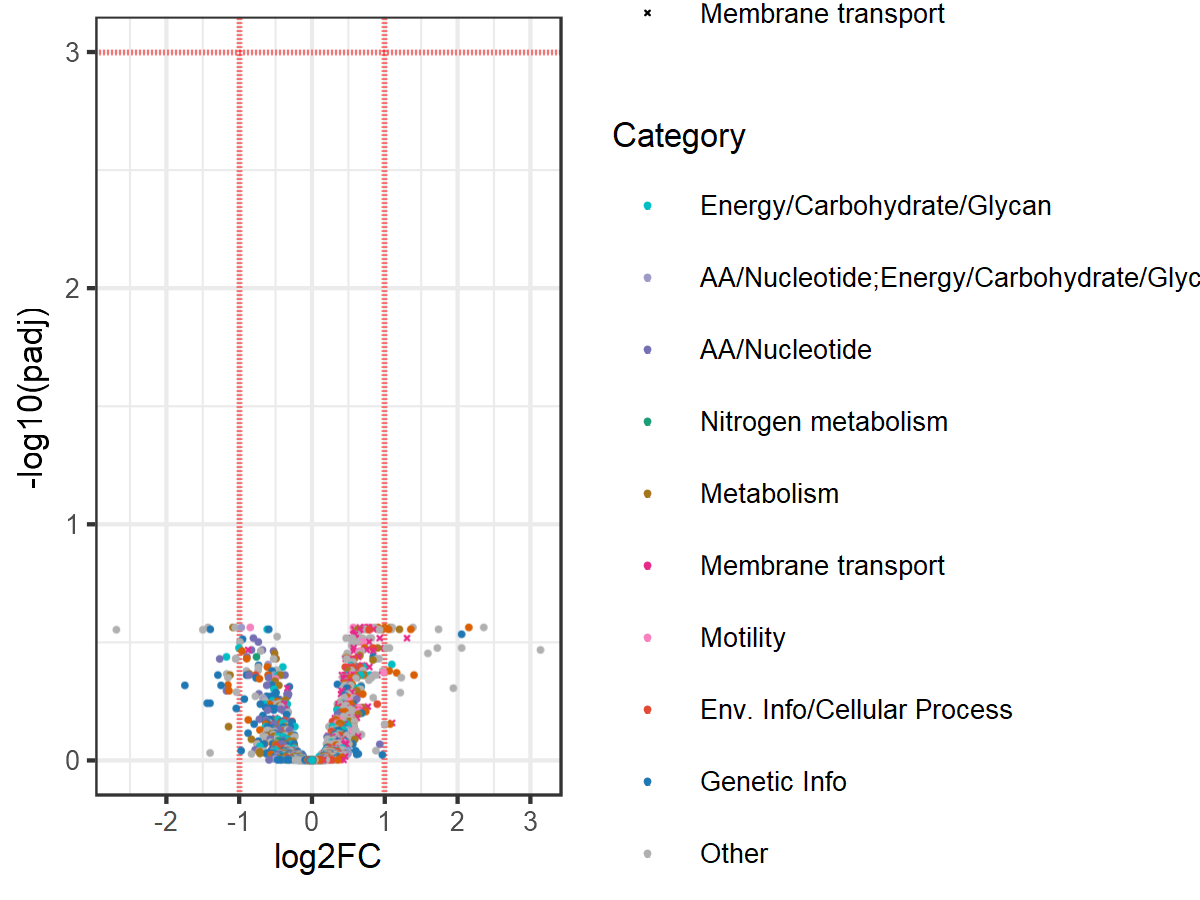

In [36]:
library(ggrepel)
assay = 'Proteome'

df_labels = df_all %>%
  filter(Assay == assay, abs(logFC) > 1.5, log.padj > 3, !is.na(gene), gene != '')

# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = logFC, y =log.padj, color=Category, fill=Category, shape=Membrane.transport 
          )) + 
    geom_vline(xintercept = c(-1,1), colour = "red", linetype="dotted" ) + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red", linetype="dotted" ) + # Add significance cutoffs
    ggrastr::geom_point_rast(size=0.3, stroke=0.3 )+
    theme_bw(base_size = 8) + # change theme
    #theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = category.cols)+
    scale_fill_manual(values = category.cols)+
    scale_shape_manual(values = c(21,4)) +
    geom_text_repel(data=df_labels,
                    aes( logFC, log.padj ,label=gene), max.overlaps = Inf, size=1,
                   box.padding=0.05, segment.size=0.1
                   )  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [37]:
ggsave('figures/HOT1A3_Axenic_DE_Proteome.svg', height = 3, width = 4)

Warning message:
"Removed 3 rows containing missing values (`geom_point()`)."


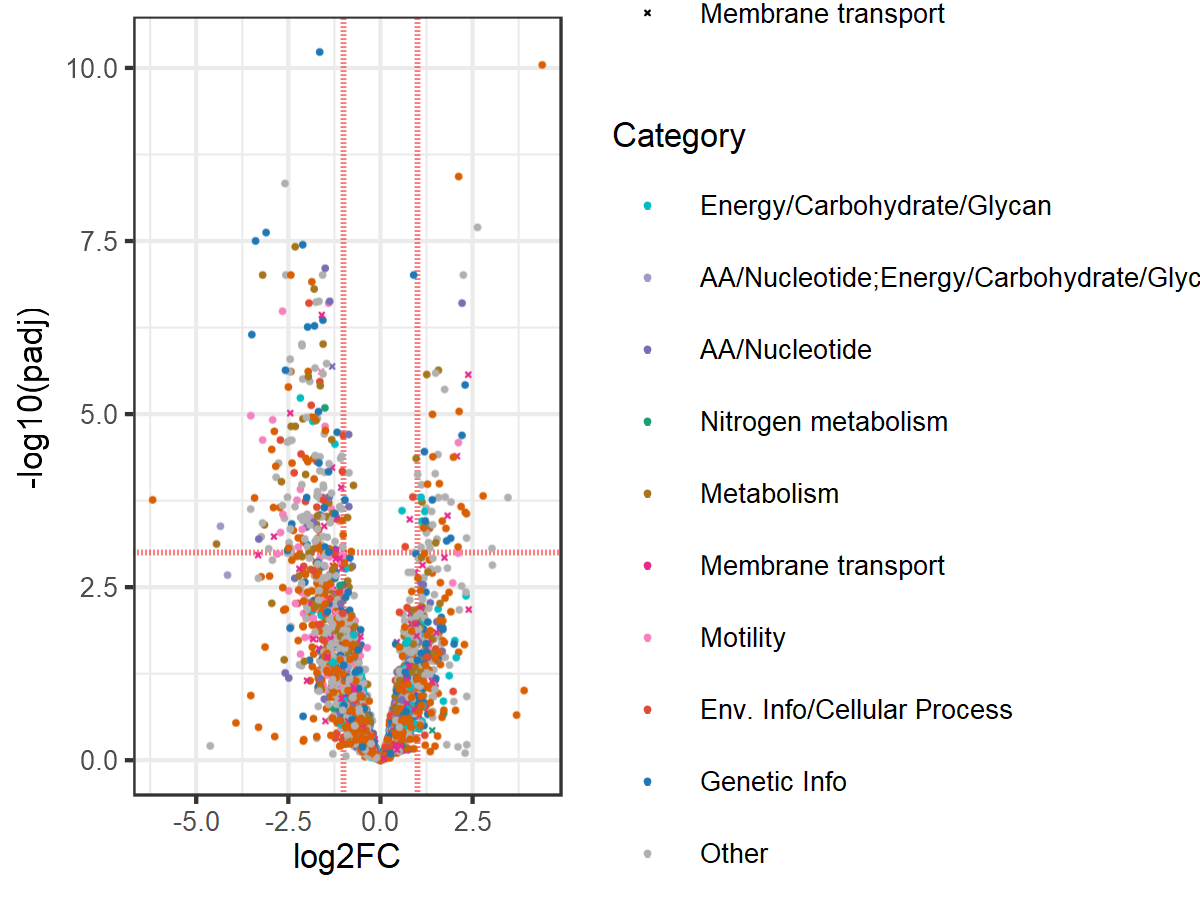

In [38]:
library(ggrepel)
assay = 'RNA'


# ymax <- 15
# df_all$capped.log.padj <- pmin(df_all$log.padj, ymax)
# xmax <- 5
# df_all$capped.logFC <- pmin(df_all$logFC, xmax)


df_labels = df_all %>%
  filter(Assay == assay, abs(logFC) > 1.5, log.padj > 15, !is.na(gene), gene != '')

# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = logFC, y =log.padj, color=Category, fill=Category, shape=Membrane.transport 
          )) + 
    geom_vline(xintercept = c(-1,1), colour = "red", linetype="dotted" ) + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red", linetype="dotted" ) + # Add significance cutoffs
    ggrastr::geom_point_rast(size=0.3, stroke=0.3 )+
    theme_bw(base_size = 8) + # change theme
    #theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = category.cols)+
    scale_fill_manual(values = category.cols)+
    scale_shape_manual(values = c(21,4)) +
    geom_text_repel(data=df_labels,
                    aes( logFC, log.padj ,label=gene), max.overlaps = Inf, size=1,
                   box.padding=0.05, segment.size=0.1
                   )  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [39]:
ggsave('figures/HOT1A3_Axenic_DE_RNA.svg', height = 3, width = 4)


Warning message:
"Removed 3 rows containing missing values (`geom_point()`)."


In [ ]:
df_all$kegg_gene

In [ ]:
help(ggsave)